<h2>Evolution of Randomness</h2>

<p>This notebook explores a couple of experiments where randomness can be used to make predictions and estimations. Randomness can be employed to investigate scenarios which would otherwise be difficult to impossible to compute, this is the central technique used in Monte Carlo Simulations. Let's start with a simple example: we will create a circlular area and a rectangular area within a fixed box, then pick random co-oordinates and determine if the random co-ordinate falls within the rectangular area or the circular area. 

By setting the radius of the cicular area to equal the width of the square box,  then  it should follow that as you pick select co-ordinates randomly and divide the number of co-ordinates in the circle by the number of co--ords in the square then you should get Pi! 
    
    Area_circle = Pi.r^2
    Area_square = r^2
    Area_circle/Area_square = Pi
    
By increasing the number of randomly selected co-ordinates then the calulation of Pi should become more accurate. 
</p>




<IPython.core.display.Javascript object>


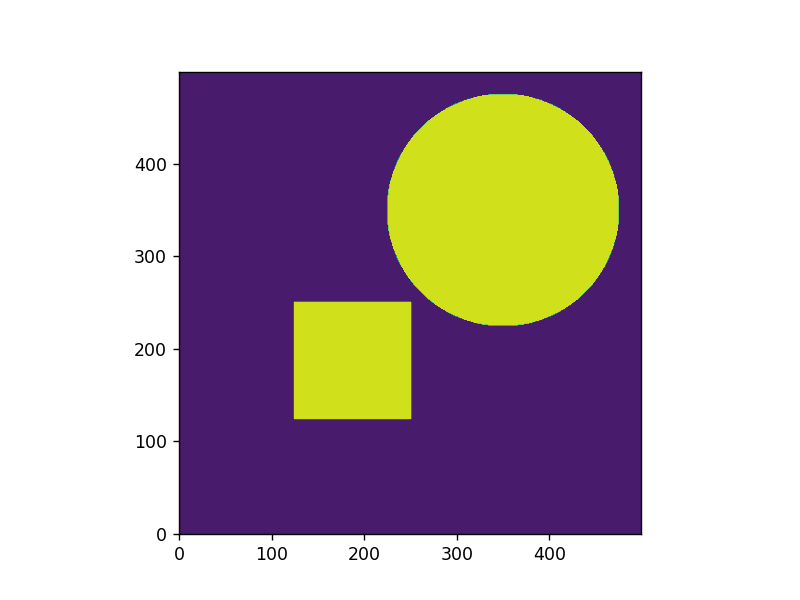

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib notebook
warnings.filterwarnings('ignore')

SimBoxSize = 500
x = np.arange(0, SimBoxSize, 1)
y = np.arange(0, SimBoxSize, 1)
xx, yy = np.meshgrid(x, y, sparse=True)

r = 125

def InSquare(i,j):
    if(i >= r and i <= 2 * r and j >= r and j <= 2 * r):
        return 1
    else:
        return 0


def InCircle(i,j):
    if(pythDiff(i,j) < r):
        return 1
    else:
        return 0

circleX = 350
circleY = 350

def pythDiff(i,j):
    return ((circleX-i)**2 + (circleY - j)**2)**0.5



def InShapes(i,j):
    if(InCircle(i,j) ==1 or InSquare(i,j)==1):
        return 1
    else:
        return 0


vInSquare = np.vectorize(InShapes)

z = vInSquare(xx,yy)
h = plt.contourf(x,y,z)

plt.axes().set_aspect('equal')
plt.show()

<p>Now lets drop co-ordinates randomly in the box and see if they land in the Circle or the Square</p>

In [44]:
def IsCoordInCircle(x):    
    return InCircle(x[0], x[1]) 

def IsCoordInSquare(x):    
    return InSquare(x[0], x[1])   

def CalcPi(n):
    
    coords = np.random.randint(SimBoxSize, size=(n, 2))

    df = pd.DataFrame(coords)
    df["InCircle"] = 0
    df["InSquare"] = 0

    return(df.apply(IsCoordInCircle, axis=1).sum()/ df.apply(IsCoordInSquare, axis=1).sum())

<p>Now lets see how as we increase the number of randomly dropped co-ordinates, the calulation of Pi gets closer and closer to Pi</p>


In [45]:
n = 100000
coords = np.random.randint(SimBoxSize, size=(n, 2))
df = pd.DataFrame(coords, columns=['x', 'y'])


df["InCircle"] = df.apply(IsCoordInCircle, axis=1)
df["InSquare"] = df.apply(IsCoordInSquare, axis=1)
df["TotInCircle"] = df["InCircle"].cumsum()
df["TotInSquare"] = df["InSquare"].cumsum()

#Lets ignore the first few rows where there are isn't a finite total in Circle/Square
df = df[(df["TotInCircle"] > 0) & (df["TotInSquare"] > 0)]

df = df.reset_index()
df = df.drop(columns=["index"])

df["Pi"] = df["TotInCircle"]/df["TotInSquare"]

<IPython.core.display.Javascript object>


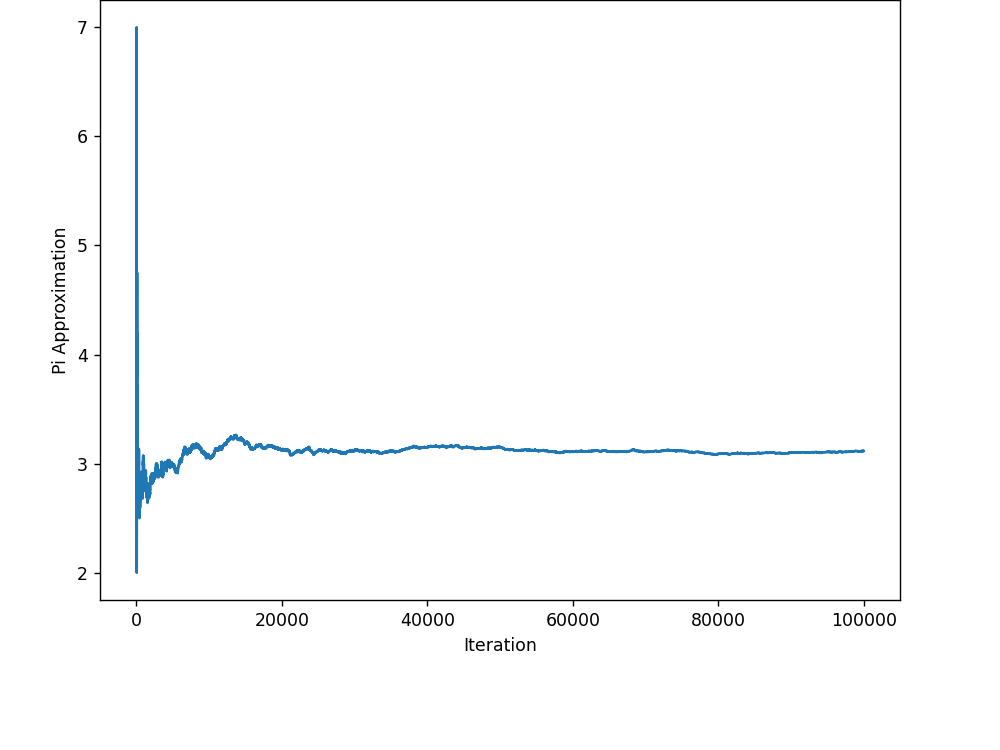

In [46]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.8])
ax.set_xlabel('Iteration')
ax.set_ylabel('Pi Approximation')
ax.set_title('Calculation of Pi via Monte Carlo Method.')
ax.plot(df["Pi"])


<p>The above plot shows how as you increase the number of particles placed randomly in the bounds of the simulation, the resultant calculation of Pi becomes closer to Pi.</p> 

<p>Let's examine this plot a with greater detail to demonstrate how the calculation of Pi evolves with a greater sample size</p>

<IPython.core.display.Javascript object>


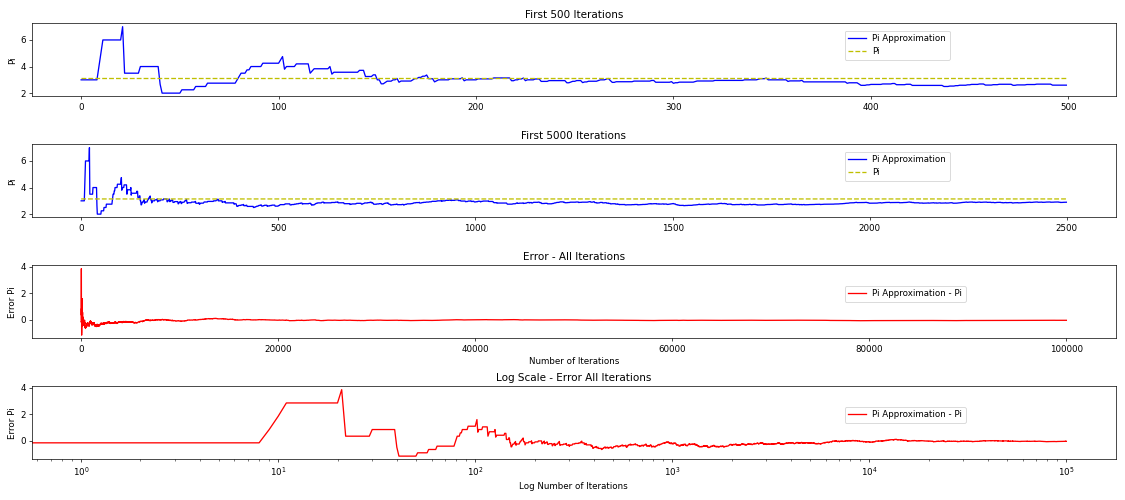

In [47]:
#lets zoom in a little to demonstrate how with more iterations the calulation of pi trends to zero
xlims = [500, 2500, 9000, 9000] 

horiz_line_data1 = np.array([np.pi for i in range(xlims[0])])
horiz_line_data2 = np.array([np.pi for i in range(xlims[1])])
horiz_line_data3 = np.array([np.pi for i in range(xlims[2])])


titles= ["First 500 Iterations", "First 5000 Iterations", "Error - All Iterations", "Log Scale - Error All Iterations"]
datasets = [
            [df["Pi"][:500], horiz_line_data1],
            [df["Pi"][:2500], horiz_line_data2],
            [df["Pi"]- np.pi],
            [df["Pi"]- np.pi],
           ]
            
labels = [["Pi Approximation", "Pi"],["Pi Approximation", "Pi"], ["Pi Approximation - Pi"], ["Pi Approximation - Pi"] ]
xLabels = ["", "", "Number of Iterations", "Log Number of Iterations"]
yLabels = ["Pi", "Pi", "Error Pi", "Error Pi"]
figColours = [["b", "y"], ["b", "y"], "r", "r"]
lineStyles = [["-", "--"], ["-", "--"], ["-"], ["-"]]
scales = [[], [], [], ["log", 10]]

fig,axes = plt.subplots(nrows=len(titles),figsize=(18,8), dpi=50)


i =0
for ax in axes:
    j = 0
    for ds in datasets[i]:      
        ax.plot(ds, figColours[i][j], label=labels[i][j], linestyle=lineStyles[i][j])
        j = j +1
    ax.set_xlabel(xLabels[i])
    ax.set_ylabel(yLabels[i])
    ax.set_title(titles[i])
    ax.legend(loc=(0.75,0.5))
    if(len(scales[i]) > 0):
        ax.set_xscale(scales[i][0], base=scales[i][1])
    i = i + 1


plt.tight_layout()

<p>The above plots show how the variation in the calulation of Pi rapidly falls after the first 1000 or so iterations. Below let's output the final calculation of Pi.</p>


In [59]:
print("Final Calulation of Pi = "  + str(df["Pi"].iloc[-1]))
print("The final error in calculating Pi = " + str(df["Pi"].iloc[-1] - np.pi))

Final Calulation of Pi = 3.115451802445609
The final error in calculating Pi = -0.026140851144184296


<h2>Particle Self-Assembly</h2>

<p>Lets move onto something abit more involved, lets create a simulation where a number of particles are suspended in a vacuum with no external forces acting upon them. Lets assume that these particles interact with each other via a simple attractive force to start, where the interaction energy decreases proportionally with inter-particle distance.</p>
<br/>    
<p>If we were to suspend a number of particles in these conditions, in accordance with the Principle of Minimum Energy, i.e. the second law of thermodynamics, over time the collection of particles should self-assemble into a configuration which minimises the total energy of the system. This self assembly can be simulated via a Monte Carlo approch.</p>
<br/>
<p>If we calculate the sum of the interaction energies of the all inter-particle relationships (ensamble energy), move a random particle by a small distance, in a random direction and recalculate the ensamble energy. We can then either accept the move if the energy of the system has reduced, or decline the move if the energy of the system increased. In order to avoid reaching local energetic minima as oppoed to the global minima we should accept moves, even when the energy of the system increased, randomly with a certain liklihood. As more iterations are added to the system, the particles will self assemble into a structure with a minimal the ensamble energy. The spatial properties of this structure will reflect the interaction energy which is imposed upon it, lets start with the aforementioned proportional relationship between inter-particle energy and interparticle distance. </p>


<IPython.core.display.Javascript object>


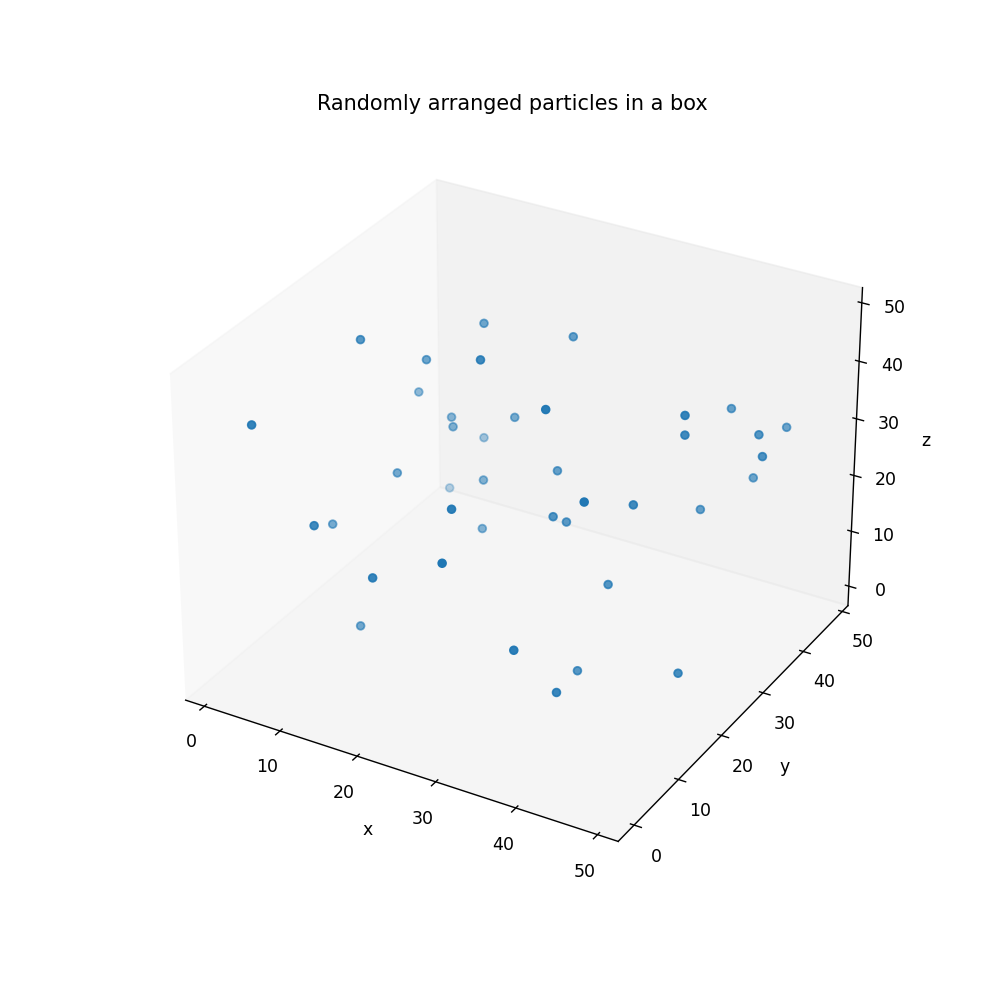

In [1]:
#First of all, lets initialise a 3D random collection of particles. 

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook


def ShowScatter(data, title):
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title(title)
    ax.grid(False)
    ax.scatter3D(data['x'], data['y'], data['z'], zdir='z')
    plt.show()
    
SimBoxSize = 50
numberOfParticles = 40    
coords = np.random.randint(SimBoxSize, size=(numberOfParticles, 3))
df = pd.DataFrame(coords, columns=['x', 'y', 'z'])


ShowScatter(df, "Randomly arranged particles in a box")

In [2]:
#Now we need to look at actually generating some data - lets first define a function which determines an interaction energy 
#between two particles - given each particle is a 1x3 numpy matrix

def IntEnrg(p1, p2):
    dist = np.sqrt(np.sum((p1-p2)**2, axis =0))
    return EnrgFunc(dist)
    
# for a proof of concept lets suppose we have a attractive force such that the energy of the system increases with distance   
def EnrgFunc(d):
    return d


#Now Lets Sum the interaction energies between the first particle and the others


import timeit


starttime = timeit.default_timer()


tot = 0
for i in range(len(df)):
    for j in range(len(df)):
        if(i is not j):
            tot = tot + (IntEnrg(np.array(df.loc[i]), np.array(df.loc[j])))
print("The time difference is :", timeit.default_timer() - starttime)
print("energy of system = " + str(tot))


The time difference is : 0.27387720000000115
energy of system = 50887.07175320329


<p>This method of calculating the ensamble energy is very slow - See if we can improve. Easy win is to only calculate interaction energies once per particle pairing</p>
    

In [3]:
#This method of calculating the ensamble energy is very slow - See if we can improve

starttime = timeit.default_timer()

tot = 0    
for i in range(len(df)):
    for j in range(i, len(df)):
        if(i is not j):
            tot = tot +  (IntEnrg(np.array(df.loc[i]), np.array(df.loc[j])))                    
print("The time difference is :", timeit.default_timer() - starttime)
print("energy of system = " + str(tot))

The time difference is : 0.12941809999999876
energy of system = 25443.53587660166


<p>As expected the computational cost has about halved, however it is probably not necessary to calculate the entire ensamble energy every time we move a particle. Instead we can select a smaller randomised sample of the particle collection, and then determine then calculate the sum of the interaction energies in this group instead. Whilst this will be less accurate when calculating the energy of the entire system, it should still provide a means of determining whether moving a particle causes an increase or decrease in the total energy of the system sufficiently well, this binary is what drives the self assembly of the strucutre so by reducing the computation here, we will be able to propose a greater number of particle moves overall. </p>

In [4]:
starttime = timeit.default_timer()

sampleSize = 10

tot = 0    
iSample1 = np.random.randint(numberOfParticles, size=sampleSize)
iSample2 = np.random.randint(numberOfParticles, size=sampleSize)


tot = 0    
for i in iSample1:
    for j in iSample2:
        if(i is not j):
            tot = tot +  (IntEnrg(np.array(df.loc[i]), np.array(df.loc[j])))                    
print("The time difference is :", timeit.default_timer() - starttime)
print("energy of system = " + str(tot))




The time difference is : 0.027865899999998334
energy of system = 3211.7525080383816


<p>This has now cut the computational cost by around 200-fold to. More selective sample could be use to improve this effecency further - for instance only selecting particles within a certain distance of one another - however the above method will do for the time being. The next step is to select a random particle, move it by a random distance and then calculate the energy again, and hence and determine whether this particle should remain moved or not. </p>

In [5]:
def CalcEnrgyCollection(pos, SampleSize):
    iSample1 = np.random.randint(numberOfParticles, size=SampleSize)
    iSample2 = np.random.randint(numberOfParticles, size=SampleSize)

    tot = 0    
    for i in iSample1:
        for j in iSample2:
            if(i is not j):
                tot = tot +  (IntEnrg(np.array(pos.loc[i]), np.array(pos.loc[j]))) 

    return tot
                
            
def TryParticleMove(InitialSet, MaxMove, ChanceToReject, SampleSize):
          
    particleToMovePosIndex = np.random.randint(numberOfParticles)
    
    alteredSet = InitialSet["pos"].copy(deep=True)
    
    alteredSet.loc[particleToMovePosIndex]["x"] = alteredSet.loc[particleToMovePosIndex]["x"] + np.random.uniform(-MaxMove,MaxMove)
    alteredSet.loc[particleToMovePosIndex]["y"] = alteredSet.loc[particleToMovePosIndex]["y"] + np.random.uniform(-MaxMove,MaxMove)
    alteredSet.loc[particleToMovePosIndex]["z"] = alteredSet.loc[particleToMovePosIndex]["z"] + np.random.uniform(-MaxMove,MaxMove)
           
    totAfterMove = CalcEnrgyCollection(alteredSet, SampleSize)    
     
    if(totAfterMove < InitialSet["energy"] or np.random.uniform(0,1) > ChanceToReject):
        return {"pos":alteredSet, "energy":totAfterMove}
    else:
        return {"pos": InitialSet["pos"], "energy":InitialSet["energy"]}
       
        

<p>We can now attempt movng particles and based off the change in the ensambles energy accept or reject the moves. So now we can look at visualising the evolution of these particles self-assembly.</p>

In [6]:
sampleSize = 10
numberOfIterations = 100000
It1 = {"pos":df, "energy":CalcEnrgyCollection(df, sampleSize)}

Results =[]
Results.append(TryParticleMove(It1,3, 0.95, sampleSize))

for i in range(1, numberOfIterations):
    if(i%(numberOfIterations/10) == 0):
        print(str(100*i/numberOfIterations) + " % complete")
    Results.append(TryParticleMove(Results[i-1],2, 0.95, sampleSize))


10.0 % complete
20.0 % complete
30.0 % complete
40.0 % complete
50.0 % complete
60.0 % complete
70.0 % complete
80.0 % complete
90.0 % complete


<IPython.core.display.Javascript object>


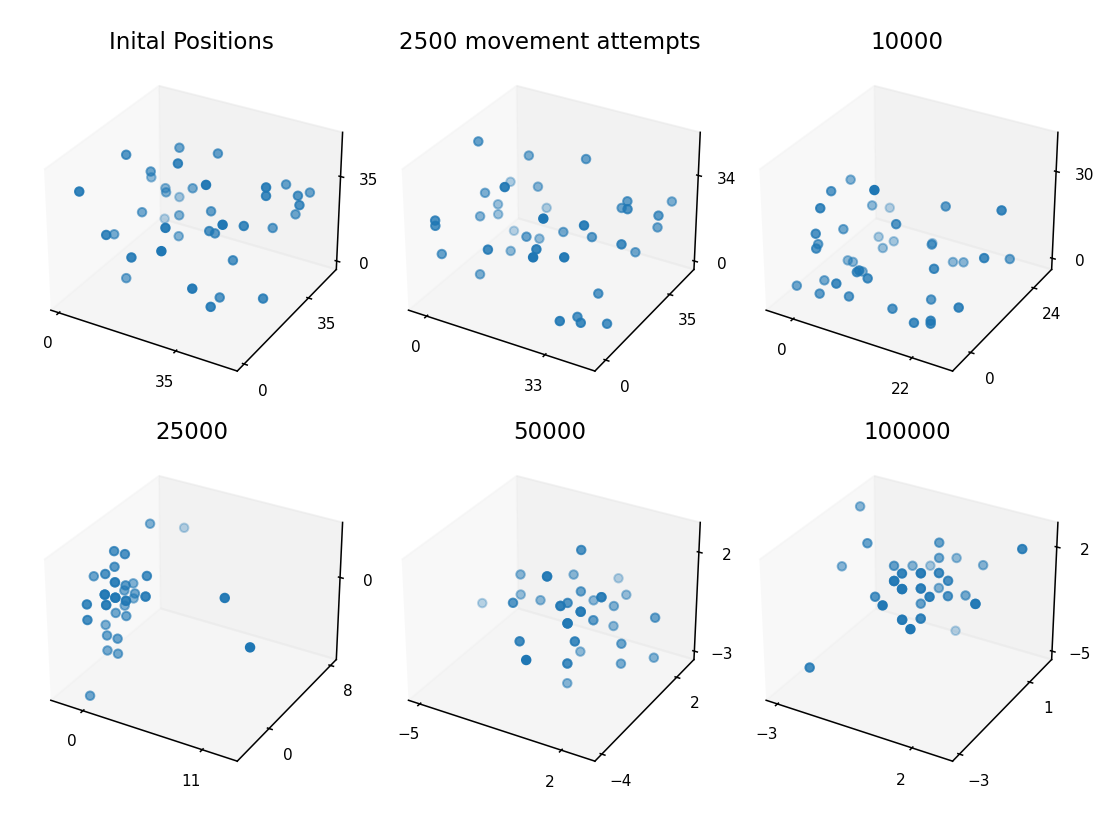

In [8]:
# Lets see how the particles move closer together over time...

data1 = Results[0]["pos"]
data2 = Results[2499]["pos"]
data3 = Results[9999]["pos"]
data4 = Results[24999]["pos"]
data5 = Results[49999]["pos"]
data6 = Results[99999]["pos"]

fig = plt.figure(figsize=plt.figaspect(0.75), dpi=110)
axes = []
titles = ["Inital Positions", "2500 movement attempts", "10000", "25000", "50000", "100000"]


axes.append(fig.add_subplot(2, 3, 1, projection='3d'))
axes.append(fig.add_subplot(2,3, 2, projection='3d'))
axes.append(fig.add_subplot(2, 3, 3, projection='3d'))
axes.append(fig.add_subplot(2, 3, 4, projection='3d'))
axes.append(fig.add_subplot(2,3, 5, projection='3d'))
axes.append(fig.add_subplot(2, 3, 6, projection='3d'))


    
    
axes[0].scatter3D(data1['x'], data1['y'], data1['z'], zdir='z')
axes[1].scatter3D(data2['x'], data2['y'], data2['z'], zdir='z')
axes[2].scatter3D(data3['x'], data3['y'], data3['z'], zdir='z')
axes[3].scatter3D(data4['x'], data4['y'], data4['z'], zdir='z')
axes[4].scatter3D(data5['x'], data5['y'], data5['z'], zdir='z')
axes[5].scatter3D(data6['x'], data6['y'], data6['z'], zdir='z')


i = 0
for ax in axes:
    ax.set_title(titles[i])
    i = i+1
    ax.grid(False)

    ax.tick_params(axis='both', which='major', pad=1, labelsize=8)

    xmin,xmax = ax.get_xlim()
 
    ymin,ymax = ax.get_ylim()
    
    zmin,zmax = ax.get_zlim()
    
    if(i<5): 
        xmax=xmax - xmin
        xmin=0

        ymax=ymax - ymin
        ymin=0

        zmax=zmax - zmin
        zmin=0
           
    ax.set_xticks(np.linspace(xmin,2 * xmax/3, 2, dtype=int))
    ax.set_yticks(np.linspace(ymin,2 * ymax/3, 2, dtype=int))
    ax.set_zticks(np.linspace(zmin,2 * zmax/3, 2, dtype=int))


plt.tight_layout()

plt.show()

<p>The above plots show snapshots of how the particles self assemble into a structure over time. Whilst initially the particles are completely randomly arranged and very spaced out, after 2500 movement attempts no large scale changes have yet taken effect, however after 10000, some structure is starting to form and the overall spread of the particles has reduced. After more iterations, the particles are clearly clumping together, with some outliers yet to be pulled into the main structure. With more iterations, you can see a regular lattice-like structure has formed, and with more iterations, the particles become more regularly spaced, and the average distance between the particles continues to decrease. To show this more clearly a larger scale figure is shown below at the end point of the simulation, orientated to best show the lattice-like structure.</p>

<IPython.core.display.Javascript object>


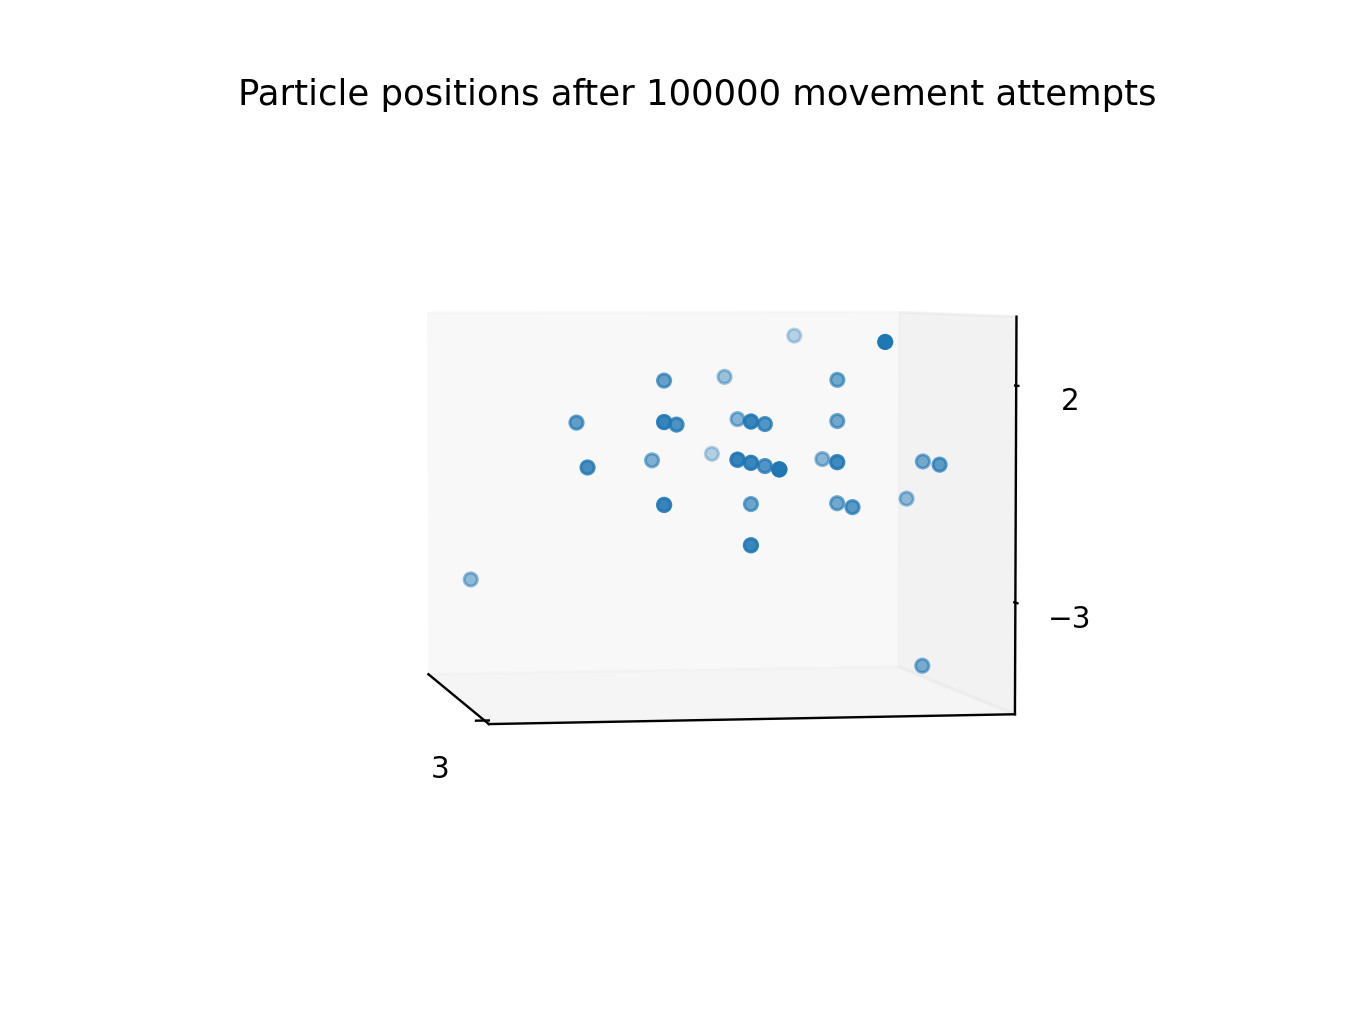

In [9]:
fig = plt.figure(dpi=170)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.grid(False)
ax.set_title("Particle positions after 100000 movement attempts")
data = Results[99999]["pos"]
ax.set_xticks(np.linspace(-4,3, 2, dtype=int))
ax.set_yticks(np.linspace(-4,3, 2, dtype=int))
ax.set_zticks(np.linspace(-3,2, 2, dtype=int))
ax.scatter3D(data['x'], data['y'], data['z'], zdir='z')


<p>To understand why the particles form this lattice strucutre, let's have a look at how the energy of the system and the average inter-particle distance changes as the experiment evolves</p>

<IPython.core.display.Javascript object>


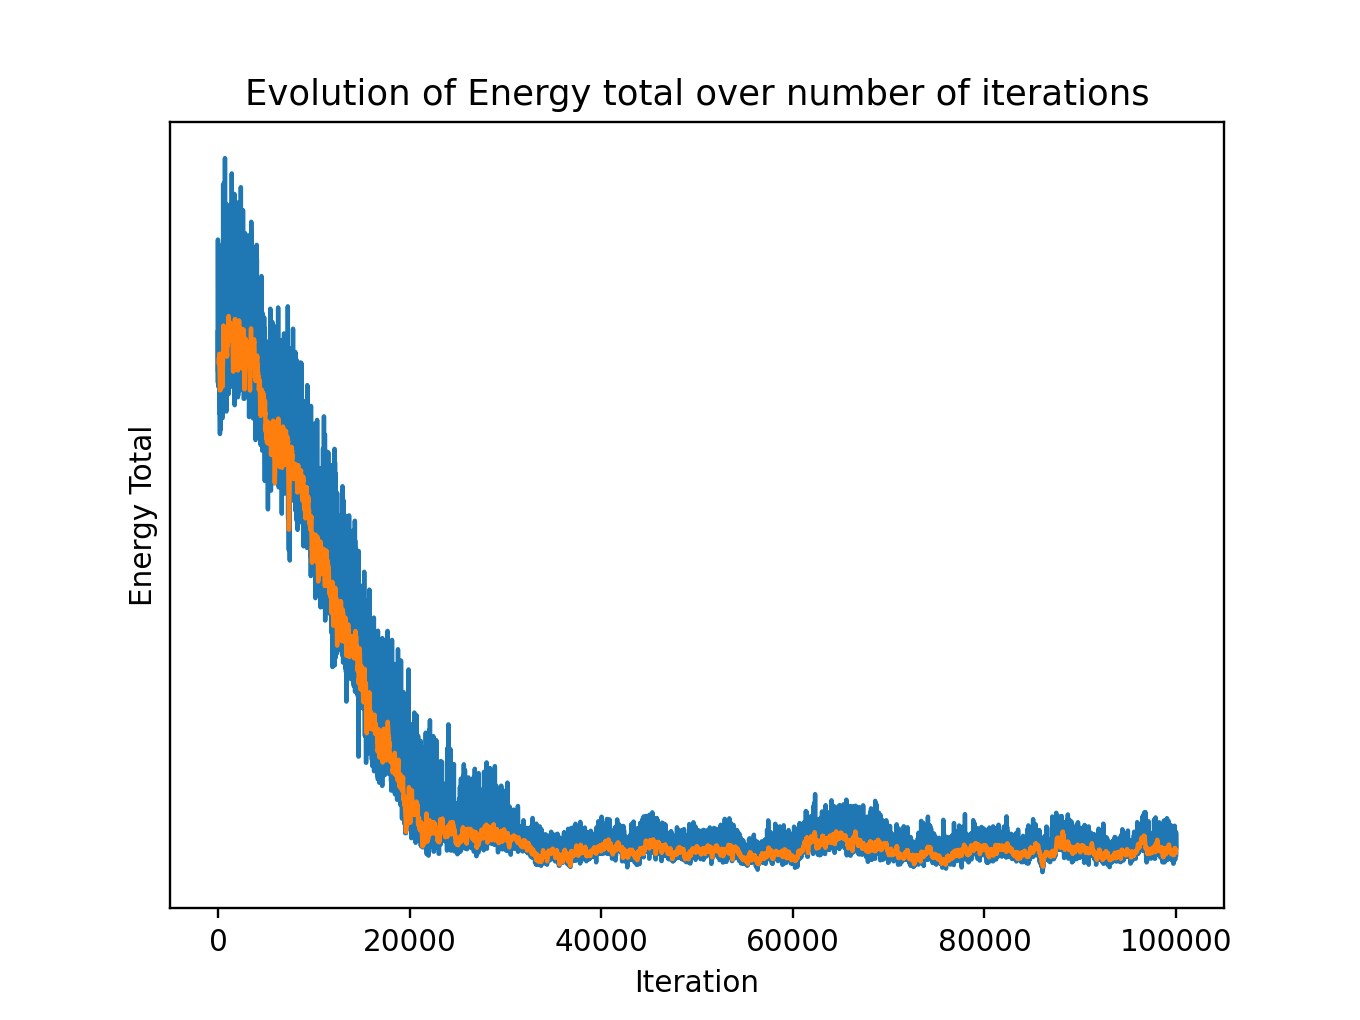

In [22]:

fig= plt.figure(dpi=170)
ax = fig.add_subplot(1, 1, 1)
#ax = fig.add_axes([0.1, 0.2, 0.8, 0.8])
ax.set_xlabel('Iteration')
ax.set_ylabel('Energy Total')
ax.set_title('Evolution of Energy total over number of iterations')
ax.set_yticks([])
energies = {}
i = 0
for res in Results:
    energies[i] = res["energy"]
    i = i+1
df = pd.DataFrame.from_dict(energies, orient='index')

df["rollingAv"] = df[0].rolling(window=100).mean()
it = np.arange(0,len(energies))
 
ax.plot(it,df[0])
ax.plot(it,df["rollingAv"])
plt.show()

<p>Here we can see the evolution of the energy of the system, although there is a general downward trend, it is interesting to note that there are bumpy sections where the system has escaped from a local minima, enabled by the random possibility of accepting an energetically unfavourable move. Let's have a look to see what the particles are configured in their lowest energetic configuration to finish. </p>

<IPython.core.display.Javascript object>


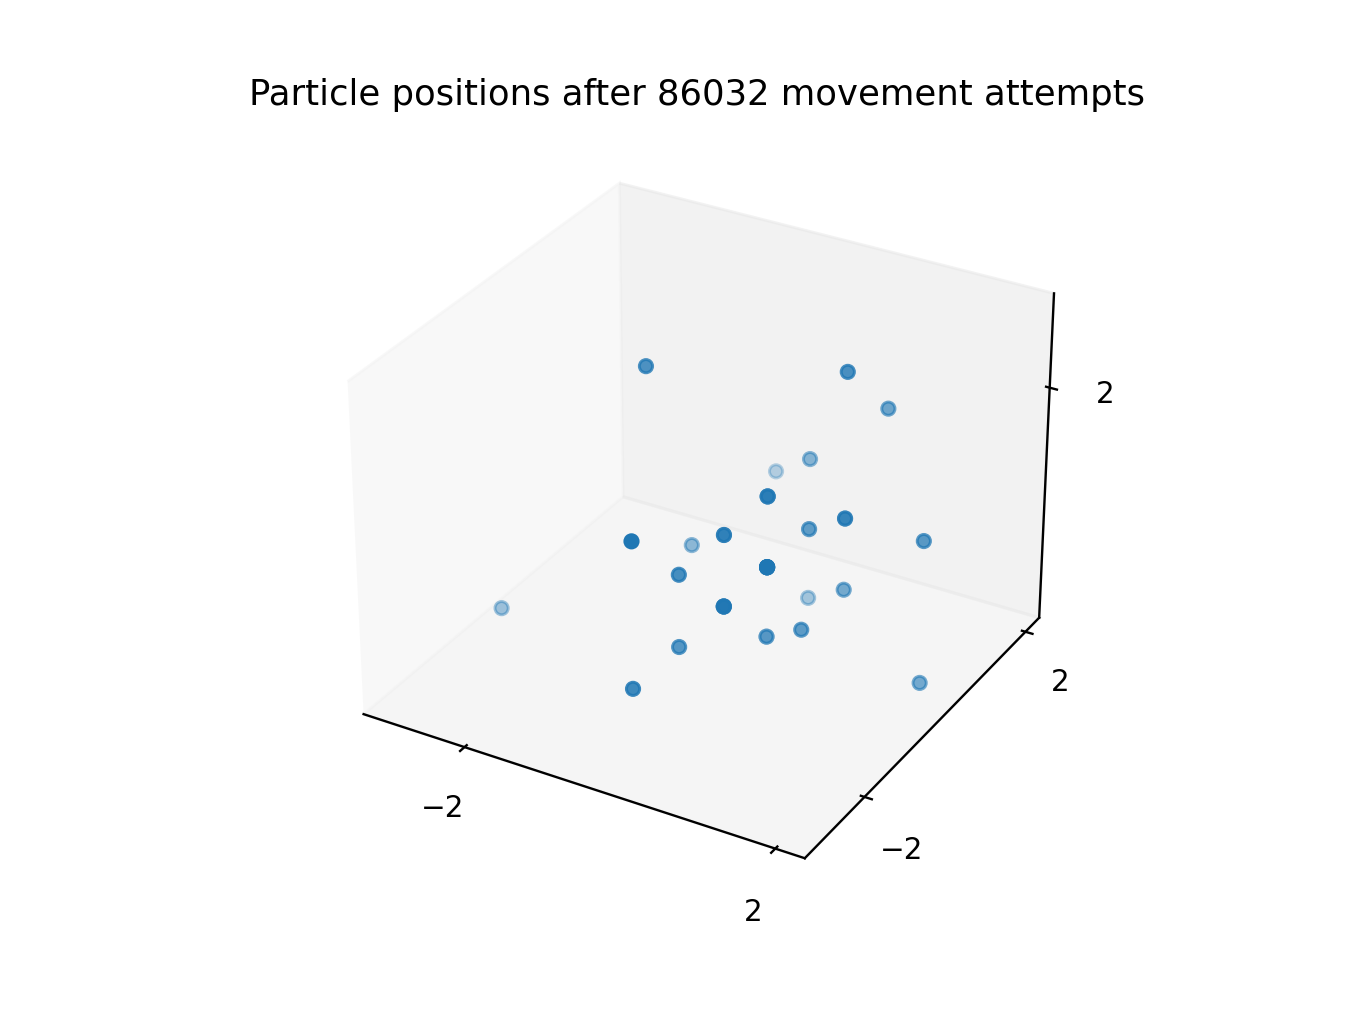

In [40]:

i = [df[0].loc[lambda x: x==df[0].min()].index][0][0]

fig = plt.figure(dpi=170)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.grid(False)
ax.set_title("Particle positions after " + str(i) + " movement attempts")
data = Results[i]["pos"]
ax.set_xticks(np.linspace(-2,2,2, dtype=int))
ax.set_yticks(np.linspace(-2, 2,2, dtype=int))
ax.set_zticks(np.linspace(-2,2,2, dtype=int))
ax.scatter3D(data['x'], data['y'], data['z'], zdir='z')


<p>Future experiements could include investigating how changing the chance of accepting an unfavourable move affects the evolution of the experiement and the overall configuration</p>